In [1]:
import pandas as pd

In [2]:
jm=pd.read_csv("C:/Users/pcc/Desktop/suga.csv")
print(jm)

     Electricity  Two_Wheeler  Four_Wheeler  Transportation_vehicle  \
0             65            2             1                       1   
1             22            1             1                       1   
2            250            1             1                       1   
3             60            1             0                       0   
4            200            2             1                       0   
..           ...          ...           ...                     ...   
98            72            2             1                       0   
99           200            1             0                       0   
100           65            3             0                       0   
101          260            2             0                       0   
102           60            2             0                       0   

     Mileage_Two_Wheeler  Mileage_Four_Wheeler  \
0                     45                    15   
1                     50                    18 

In [3]:
type(jm)

pandas.core.frame.DataFrame

In [4]:
#jm = jm.drop("Carbon_Footprint", axis=1)

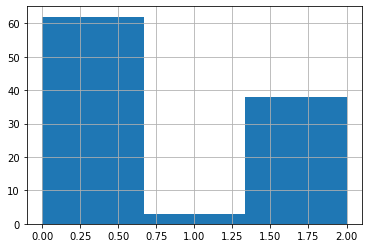

In [5]:
import matplotlib.pyplot as plt
jm["Carbon_Footprint"].hist(bins=3)
plt.show()

In [6]:
correlation_matrix = jm.corr()
correlation_matrix["Carbon_Footprint"]

Electricity                       0.063946
Two_Wheeler                       0.288917
Four_Wheeler                      0.663529
Transportation_vehicle            0.083470
Mileage_Two_Wheeler               0.181452
Mileage_Four_Wheeler              0.668516
Mileage_Transportation_Vehicle    0.110105
Vehicle_Maintenance               0.053318
EXP_Grocery                       0.163034
EXP_Clothes                       0.193384
EXP_Newspaper                     0.126542
Mob_recharge                      0.202247
Exp_computer                      0.313200
Exp_TV                            0.255938
Exp_furniture                     0.230717
Insurance                         0.377081
 Education_cost                   0.292725
Cost_family_event                -0.012523
Exp_hotel                         0.283818
Carbon_Footprint                  1.000000
Name: Carbon_Footprint, dtype: float64

In [7]:
X = jm.drop("Carbon_Footprint", axis=1)
X = X.values
y = jm["Carbon_Footprint"]
y = y.values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=6)

In [54]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.7879942635258163

In [56]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

1.0177004891982149

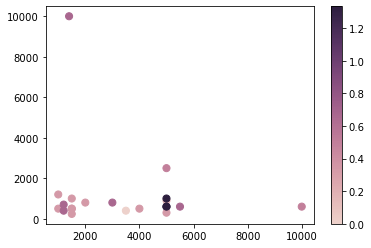

In [57]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:,-5], X_test[:,-8], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

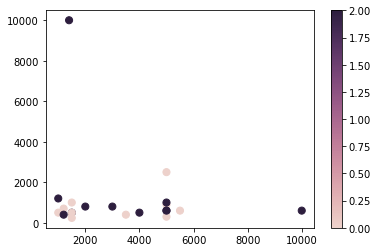

In [58]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, -5], X_test[:, -8], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [60]:
gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}

{'n_neighbors': 25, 'weights': 'distance'}

In [61]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse



0.8751633122856166

In [62]:
test_rmse

1.04662510343621

In [63]:
parameters = {"n_neighbors": range(1, 50),
              "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_
{'n_neighbors': 25, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

1.0122562167578182

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [72]:
#print(accuracy_score(y_test, test_preds))
#print(confusion_matrix(y_test, test_preds))
#print(classification_report(y_test, test_preds))
